<a href="https://colab.research.google.com/github/HVTrieuDuong/TRI-TUE-NHAN-TAO-HCMUTE/blob/main/Mnist(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step


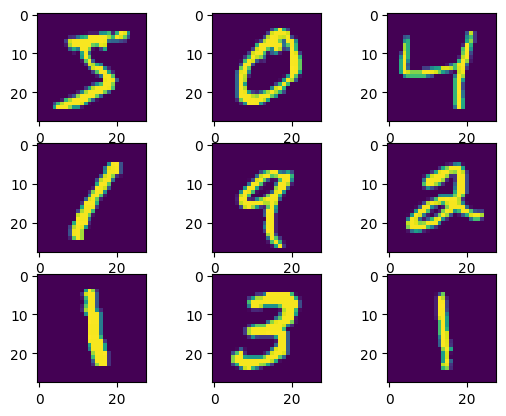

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=mnist.load_data()
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [2]:
x=x_test

In [3]:
x_train =x_train.reshape(60000,784)

In [4]:
x_train =x_train.reshape(60000,784)

In [5]:
x_test = x_test.reshape(10000,784)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train/=255
x_test/=255

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
y_train.shape

(60000, 10)

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, batch_size=128,epochs =20, verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
469/469 [==============================] - 17s 33ms/step - loss: 0.2518 - accuracy: 0.9223 - val_loss: 0.1071 - val_accuracy: 0.9647
Epoch 2/20
469/469 [==============================] - 12s 26ms/step - loss: 0.1033 - accuracy: 0.9684 - val_loss: 0.1051 - val_accuracy: 0.9646
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0730 - accuracy: 0.9774 - val_loss: 0.0710 - val_accuracy: 0.9788
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0584 - accuracy: 0.9814 - val_loss: 0.0688 - val_accuracy: 0.9790
Epoch 5/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0467 - accuracy: 0.9850 - val_loss: 0.0640 - val_accuracy: 0.9813
Epoch 6/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.0813 - val_accuracy: 0.9788
Epoch 7/20
469/469 [==============================] - 15s 31ms/step - loss: 0.0337 - accuracy: 0.9891 - val_loss: 0.0652 - val_accuracy: 

In [13]:
score=model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 0.0805 - accuracy: 0.9856


In [14]:
model.save('final.h5')

In [15]:
history=model.fit(x_train, y_train, batch_size=128,epochs =5, verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.0787 - val_accuracy: 0.9850
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0812 - val_accuracy: 0.9851
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0935 - val_accuracy: 0.9850
Epoch 4/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0818 - val_accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.0929 - val_accuracy: 0.9835


In [16]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss =', score[0])
print('Test accurracy =', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0929 - accuracy: 0.9835
Test loss = 0.09294535964727402
Test accurracy = 0.9835000038146973


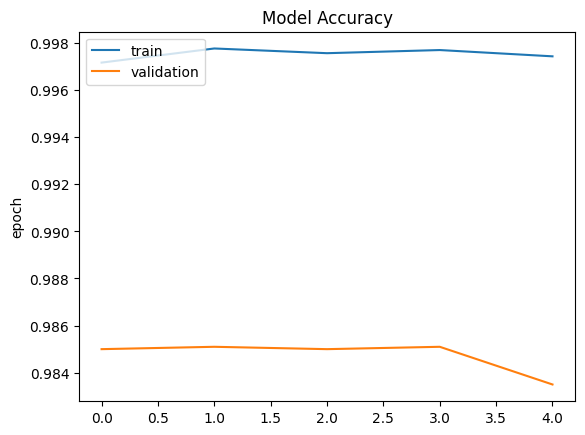

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','validation'],loc='upper left')

313/313 [==============================] - 2s 6ms/step
[8.98492250e-17 1.10118866e-14 1.55811615e-15 5.21452890e-12
 1.56954978e-18 2.50006991e-19 3.65197516e-24 9.99999940e-01
 1.57168949e-17 1.53895369e-11]


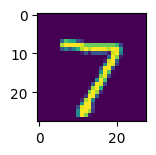

[5.2991911e-20 1.1765586e-15 9.9999994e-01 5.9438297e-20 2.3307350e-30
 1.4087879e-26 8.9930814e-25 5.8977651e-24 2.2398044e-23 3.2270231e-34]


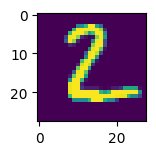

[3.16694237e-16 9.99999940e-01 1.60947540e-11 1.18194263e-16
 6.99406678e-12 4.31113216e-15 5.28926295e-13 9.46523748e-10
 1.03352795e-11 1.38720687e-17]


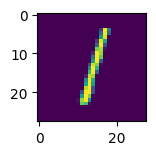

[9.9999994e-01 2.4527906e-11 6.4314315e-10 3.0266042e-14 1.7175326e-13
 1.7972290e-12 1.5312314e-09 3.2905629e-12 1.6714097e-16 1.4897170e-11]


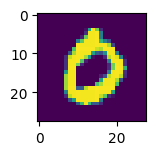

[4.0079195e-13 5.8505302e-16 1.1018141e-15 5.0649618e-19 9.9999994e-01
 7.6918321e-19 2.5211229e-17 3.7130897e-12 5.1290720e-17 3.3255308e-08]


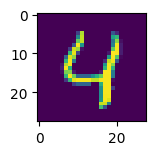

[8.1595386e-19 9.9999994e-01 3.1684286e-16 3.7923113e-18 2.8978198e-12
 2.0230665e-19 1.0031438e-16 5.1897806e-09 1.3680416e-13 4.3289712e-19]


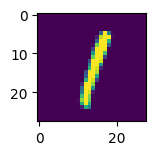

[2.1203828e-18 2.1099270e-17 3.7956394e-18 1.4341749e-19 9.9999982e-01
 2.7994397e-14 4.2584923e-19 9.4627261e-14 4.8119053e-10 1.6017566e-07]


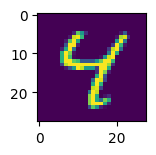

[3.6979198e-21 2.8459619e-17 5.5476565e-14 7.5784286e-09 4.6926222e-12
 4.3551004e-15 3.7473013e-25 6.2947195e-13 4.0402200e-19 9.9999994e-01]


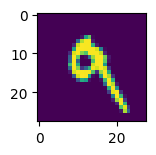

[2.8829783e-16 8.8641214e-16 4.6771246e-13 1.0465022e-16 6.9721340e-11
 9.8357099e-01 1.6425883e-02 1.6969477e-19 3.6035539e-07 2.6627854e-06]


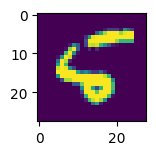

In [18]:
from keras.datasets import fashion_mnist
y_pred=model.predict(x_test)
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x[i])
  print(y_pred[i])
  plt.show()